In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [103]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df.head())

   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4             

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

In [ ]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

### Accuracy for model prediction formula
correct predictions / total observations

### Train/test split + computing accuracy

We commonly use 20-30% of our data as the test set. By setting the test_size argument to 0.2 we use 20% here.

axis=0 means drop row and axis=1 means drop column

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

#Remove the churn column from the DataFrame (because it's the label we want to predict).
#.values means convert the remaining data (features) into a NumPy array.
X = churn_df.drop("churn", axis=1).values
#print(X)
y = churn_df["churn"].values
#print(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

### Overfitting and underfitting

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

### Visualizing model complexity

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Creating Features

In [15]:
sales_df = pd.read_csv('advertising_sales.csv')
print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [23]:
X = sales_df['radio']
print(X)
print(type(X))

0        6566.23
1        9237.76
2       15886.45
3       30020.03
4        8437.41
          ...   
4541     4472.36
4542    20610.69
4543    19800.07
4544    17534.64
4545    15966.69
Name: radio, Length: 4546, dtype: float64
<class 'pandas.core.series.Series'>


In [29]:
X = sales_df['radio'].values
print(X)
print(type(X))
print(X.shape)

[ 6566.23  9237.76 15886.45 ... 19800.07 17534.64 15966.69]
<class 'numpy.ndarray'>
(4546,)


In [67]:
y = sales_df['sales'].values
X = X.reshape(-1, 1)

print(X)
print('After reshaping:',X.shape)
print(X.shape, y.shape)

[[ 6566.23]
 [ 9237.76]
 [15886.45]
 ...
 [19800.07]
 [17534.64]
 [15966.69]]
After reshaping: (4546, 1)
(4546, 1) (4546,)


## Building a linear regression model

In [52]:
#from sklearn.linear_model import LinearRegression

#Create the model
reg = LinearRegression()

#Fit the model to the data
reg.fit(X, y)

#Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model

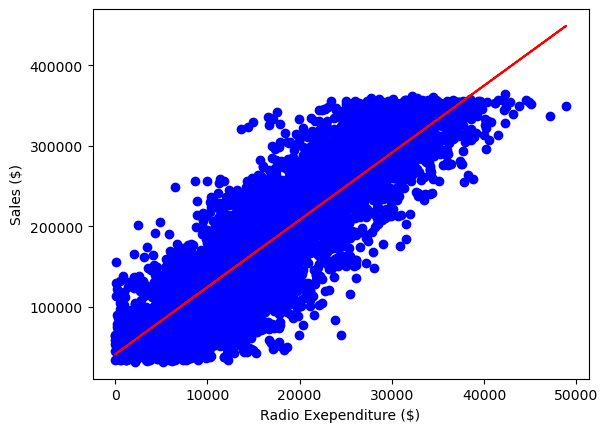

In [57]:
#Create scatter plot
plt.scatter(X, y, color='blue')

#Create line plot
plt.plot(X, predictions, color='red')

plt.xlabel('Radio Exependiture ($)')
plt.ylabel('Sales ($)')
plt.show()

## Fit and predict for regression

In [90]:
#from sklearn.model_selection import train_test_split

X = sales_df.drop(['sales', 'influencer'], axis=1).values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Instantiate the model
reg = LinearRegression()

#Fit the model to the date
reg.fit(X_train, y_train)

#Make predictions
y_pred = reg.predict(X_test)

print('Predictions: {}, Actual Values: {}'.format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [88]:
print(sales_df.dtypes)

tv              float64
radio           float64
social_media    float64
influencer       object
sales           float64
dtype: object


## Regression Performance

In [109]:
# Import mean_squared_error
#from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)   #root_mean_squared_error
#rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001238


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
